# Test EV control

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from ev_ssm import ev_ssm
from tqdm import tqdm
import scipy.stats as stats

In [2]:
# manually search perceptron hyperparameters for binary classification
import cProfile as profile
import pstats

In [3]:
sse0 = ev_ssm(ts=18, N=50000, step=1, tp=40,
              lr=0.1, lp=40, seed=2022, name="EVA",
              n_pref=1, is_report=True,
              tt_mean=0.5, tt_var=0.2, tt_lb=0, tt_ub=1,
              ict=True, ecc=True, agc=True)
sse0.load_A("Aest.csv")


EVA: ts=18[H], 50000 EVs, Total Q=434.54 MWh
Online 14477, Q=362.27 MWh, SoC=0.7435
Power(MW): Pt=-39.0266, Pc=-39.0266, Pd=-0.0
Ctrl: 0=7897; 1=6580; 
EVA: Load A from Aest.csv.


In [4]:
sse0.ev['nam'].max()

4193

In [5]:
self = sse0


states = self.ev[self.ev['lc'] == 0][['c2', 'sx', 'u']].apply(
    lambda x: (x[0], x[1]) if x[2] else (-1, -1), axis=1)
states
# sse0.g_x()
self.x0.shape

self.xtab

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,0,0,0,44,237,455,667,709,668,650,661,656,609,601,493,123,7,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,344,1201,1674,1669,2997
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
self = sse0

pcn = self.ev['Pc'].mean() * self.ev['nc'].mean()
self.ev['nam'] = ((self.ev['tf'].mean() - self.ev['ts'].mean() + self.ev['tt']) * pcn
                  - self.ev['socd'] * self.ev['Q']) * 3600 / (pcn * self.config['t_agc'])
self.ev['nam'] = self.ev['nam'].astype(int)
self.ev['nam'].max()

4471

<AxesSubplot:>

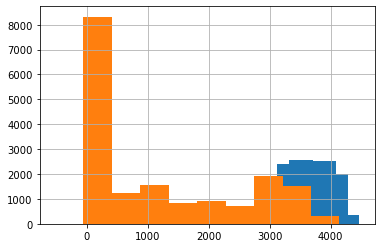

In [7]:
sse0.ev['nam'].hist()
sse0.ev['na'].hist()

In [8]:
# --- Response ---
from ev_ssm import ev_ssm
import numpy as np

sse = ev_ssm(ts=18, N=50000, step=1, tp=40,
             lr=0.1, lp=40, seed=2022, name="EVA",
             n_pref=1, is_report=True,
             tt_mean=0.5, tt_var=0.2, tt_lb=0, tt_ub=1,
             ict=False, ecc=True)
sse.load_A("Aest.csv")

evd0 = sse.ev.copy()

# quiet some EVs by force
# np.random.seed(sse.config["seed"])
# ict_rid = np.random.randint(low=0,
#                             high=sse.ev.shape[0],
#                             size=3000)

# sse.ev.na.iloc[ict_rid] = sse.ev.nam.iloc[ict_rid]
# sse.ev.lc.iloc[ict_rid] = 1
# sse.g_u()

# initial EV data
evd0 = sse.ev.copy()

sse.g_frc()


EVA: ts=18[H], 50000 EVs, Total Q=434.54 MWh
Online 14477, Q=362.27 MWh, SoC=0.7435
Power(MW): Pt=-39.0266, Pc=-39.0266, Pd=-0.0
Ctrl: 0=7897; 1=6580; 
EVA: Load A from Aest.csv.


[122.78930010102349, 28.573280642779835]

In [9]:
sse.run(tf=18 + 40/3600, Pi=50,
        is_updateA=False, is_rstate=True,
        is_test=False, disable=True)

for i in range(10):
        sse.run(tf=18 + (40 + i)/3600, Pi=50,
                is_updateA=False, is_rstate=True,
                is_test=False, disable=True)

EVA: end time 18.011111111111113[H] is too close to start time 18.01111111111115[H],simulation will not start.


In [21]:
sse.tsd

,ts,Pi,Pr,Prc,Per,ne,nec,Ptc,Pcc,Pdc,Pt
0,18.000000,0,0,0.0,0.0,14477,14477,-39.026647,-39.026647,-0.0,-38.369834
1,18.000278,50,0,0.0,0.0,14479,14479,-39.039209,-39.039209,-0.0,-38.375135
2,18.000556,50,0,0.0,0.0,14479,14479,-39.033261,-39.033261,-0.0,-38.375135
3,18.000833,50,0,0.0,0.0,14480,14480,-39.032807,-39.032807,-0.0,-38.377785
4,18.001111,50,0,0.0,0.0,14482,14482,-39.032823,-39.032823,-0.0,-38.383086
5,18.001389,50,0,0.0,0.0,14482,14482,-39.020690,-39.020690,-0.0,-38.383086
6,18.001667,50,0,0.0,0.0,14484,14484,-39.033181,-39.033181,-0.0,-38.388387
7,18.001944,50,0,0.0,0.0,14484,14484,-39.027616,-39.027616,-0.0,-38.388387
8,18.002222,50,0,0.0,0.0,14485,14485,-39.034492,-39.034492,-0.0,-38.391037
9,18.002500,50,0,0.0,0.0,14485,14485,-39.034492,-39.034492,-0.0,-38.391037


(<Figure size 600x300 with 1 Axes>,
 <AxesSubplot:title={'center':'AGC response'}, xlabel='Time [s]', ylabel='Power (MW)'>)

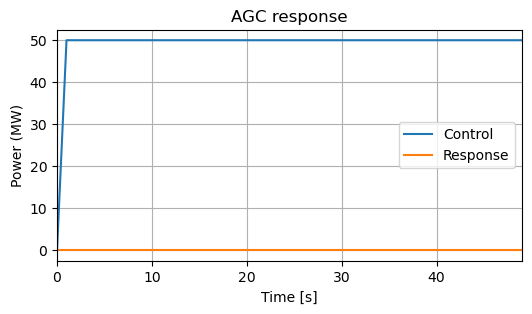

In [10]:
sse.plot_agc()

(<Figure size 600x300 with 1 Axes>,
 <AxesSubplot:title={'center':'AGC response'}, xlabel='Time [s]', ylabel='Power (MW)'>)

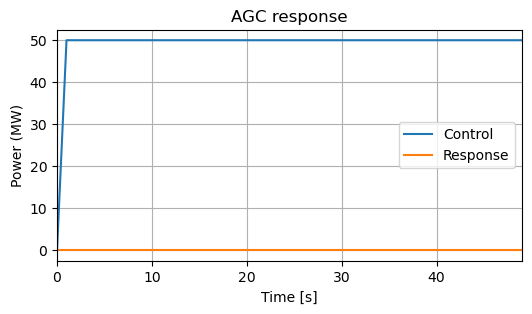

In [11]:
sse.plot_agc()

In [12]:
sse.run(tf=18 + 50/3600, Pi=50,
        is_updateA=False, is_rstate=True,
        is_test=False, disable=True)

(<Figure size 600x300 with 1 Axes>,
 <AxesSubplot:title={'center':'AGC response'}, xlabel='Time [s]', ylabel='Power (MW)'>)

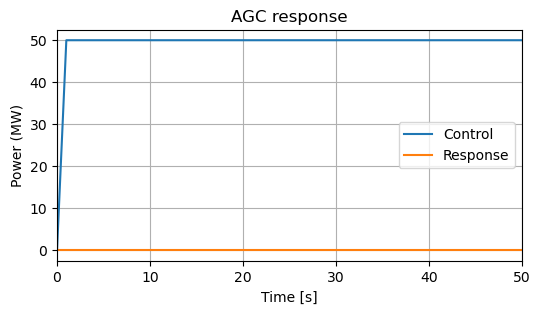

In [13]:
sse.plot_agc()

In [14]:
col = ["u", "c", "tf", "agc", "soci", "soc0", "soc", "socd", "na", "nam"]
sse.ev[col]
sse.ev[col][sse.ev['agc'] != 0]

,u,c,tf,agc,soci,soc0,soc,socd,na,nam


(<Figure size 600x300 with 1 Axes>,
 <AxesSubplot:title={'center':'AGC response'}, xlabel='Time [s]', ylabel='Power (MW)'>)

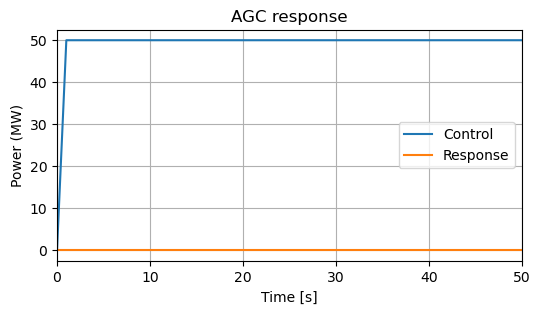

In [15]:
sse.plot_agc()

In [16]:
prof = profile.Profile()
prof.enable()
for i in range(20):
        sse.run(tf=18 + i/3600, Pi=0.5*i,
                is_updateA=False, is_rstate=True,
                is_test=False, disable=True)
for i in range(20):
        sse.run(tf=18 + (20 + i)/3600, Pi=10 - 0.5*i,
                is_updateA=False, is_rstate=True,
                is_test=False, disable=True)
prof.disable()

EVA: end time 18.0[H] is too close to start time 18.013888888888935[H],simulation will not start.
EVA: end time 18.00027777777778[H] is too close to start time 18.013888888888935[H],simulation will not start.
EVA: end time 18.000555555555554[H] is too close to start time 18.013888888888935[H],simulation will not start.
EVA: end time 18.000833333333333[H] is too close to start time 18.013888888888935[H],simulation will not start.
EVA: end time 18.00111111111111[H] is too close to start time 18.013888888888935[H],simulation will not start.
EVA: end time 18.00138888888889[H] is too close to start time 18.013888888888935[H],simulation will not start.
EVA: end time 18.001666666666665[H] is too close to start time 18.013888888888935[H],simulation will not start.
EVA: end time 18.001944444444444[H] is too close to start time 18.013888888888935[H],simulation will not start.
EVA: end time 18.002222222222223[H] is too close to start time 18.013888888888935[H],simulation will not start.
EVA: end 

(<Figure size 600x300 with 1 Axes>,
 <AxesSubplot:title={'center':'AGC response'}, xlabel='Time [s]', ylabel='Power (MW)'>)

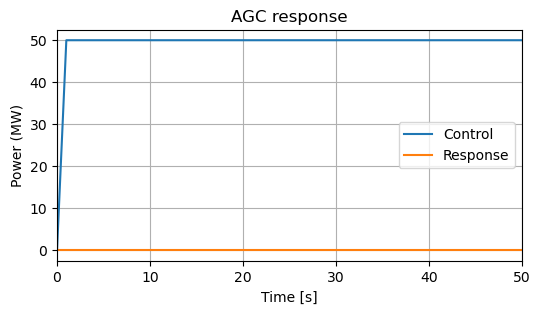

In [17]:
sse.plot_agc()

In [18]:
import time
tl = []
n = 10000
for i in range(n):
    t0 = time.time()
    idx = sse.ev[(sse.ev["u"].values == 1) & (sse.ev["c"] == 1)].index
    t = time.time() - t0
    tl.append(t)
print("n=", n, "mean[ms]=", 1e3 * np.mean(tl).round(4), "std[ms]=", 1e3*np.std(tl).round(4))

n= 10000 mean[ms]= 0.6 std[ms]= 0.0


In [19]:
import time
tl = []
n = 100
for i in range(n):
    Pi = 5 + np.random.uniform(low=-4, high=4, size=1)[0]
    t0 = time.time()
    sse.r_agc(Pi)
    t = time.time() - t0
    tl.append(t)
print("n=", n, "mean=", np.mean(tl).round(4), "std=", np.std(tl).round(4))

nec= 14519
Pr= 4.369758388303996
nec= 14519
Pr= 1.7614075690462938
nec= 14519
Pr= 1.2102884562634681
nec= 14519
Pr= 2.593501868089276
nec= 14519
Pr= 6.21900581205503
nec= 14519
Pr= 1.9835894424319997
nec= 14519
Pr= 3.9591679360143415
nec= 14519
Pr= 5.118518829007449
nec= 14519
Pr= 7.920008882008724
nec= 14519
Pr= 6.4219800943608085
nec= 14519
Pr= 1.013378973981819
nec= 14519
Pr= 5.377196000397738
nec= 14519
Pr= 4.7265850723990805
nec= 14519
Pr= 8.814815887678762
nec= 14519
Pr= 3.9642705726967886
nec= 14519
Pr= 5.691956615190927
nec= 14519
Pr= 7.645271994967421
nec= 14519
Pr= 2.7374573241625226
nec= 14519
Pr= 4.062890194505436
nec= 14519
Pr= 5.760491933944406
nec= 14519
Pr= 8.970041158441727
nec= 14519
Pr= 5.344923504122219
nec= 14519
Pr= 7.420228170426563
nec= 14519
Pr= 7.859936558405373
nec= 14519
Pr= 1.278409009983446
nec= 14519
Pr= 1.9264085414781373
nec= 14519
Pr= 3.0809612244429427
nec= 14519
Pr= 2.8150520963406276
nec= 14519
Pr= 4.924525489297558
nec= 14519
Pr= 4.260779476783373


In [20]:
stats = pstats.Stats(prof).strip_dirs().sort_stats("tottime")
stats.print_stats(20)

         5028 function calls in 0.016 seconds

   Ordered by: internal time
   List reduced from 98 to 20 due to restriction <20>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      316    0.011    0.000    0.011    0.000 {method 'acquire' of '_thread.lock' objects}
      120    0.002    0.000    0.002    0.000 socket.py:480(send)
       40    0.000    0.000    0.001    0.000 __init__.py:282(__init__)
       40    0.000    0.000    0.016    0.000 ev_ssm.py:709(run)
      120    0.000    0.000    0.002    0.000 iostream.py:209(schedule)
       40    0.000    0.000    0.012    0.000 iostream.py:470(flush)
       40    0.000    0.000    0.013    0.000 __init__.py:1060(flush)
        3    0.000    0.000    0.000    0.000 {built-in method builtins.compile}
       40    0.000    0.000    0.001    0.000 iostream.py:525(write)
       40    0.000    0.000    0.000    0.000 threading.py:228(__init__)
       39    0.000    0.000    0.011    0.000 threading.py:280(wait)
